In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

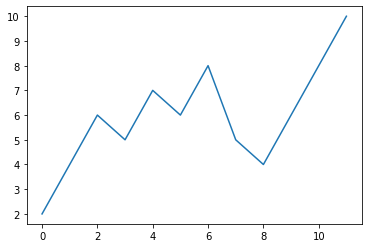

In [2]:
import matplotlib.pyplot as plt
data = [2,4,6,5,7,6,8,5,4,6,8,10]
plt.plot(data)                
plt.show()

In [3]:
import numpy as np
titanics = np.genfromtxt('../input/titanic/titanic.txt',delimiter='\t',missing_values = None,dtype=str)

In [4]:
titanics[0,:]

array(['Passenger Class', 'Name', 'Sex', 'Age',
       'No of Siblings or Spouses on Board',
       'No of Parents or Children on Board', 'Ticket Number',
       'Passenger Fare', 'Cabin', 'Port of Embarkation', 'Life Boat',
       'Survived'], dtype='<U84')

In [5]:
titanics[:,3]

array(['Age', '29', '0.9167', ..., '26.5', '27', '29'], dtype='<U84')

In [6]:
titanics = np.delete(titanics,[1,6,7,8,9,10],1)

In [7]:
rows, cols = np.where(titanics == None)
rows

array([], dtype=int64)

In [8]:
rows, cols = np.where(titanics == '')
np.unique(rows)

array([  16,   38,   41,   47,   60,   70,   71,   75,   81,  107,  108,
        109,  119,  122,  126,  135,  148,  153,  158,  167,  177,  180,
        185,  197,  205,  220,  224,  236,  238,  242,  255,  257,  270,
        278,  284,  294,  298,  319,  321,  364,  383,  385,  411,  470,
        474,  478,  484,  492,  496,  525,  529,  532,  582,  596,  598,
        673,  681,  682,  683,  706,  707,  757,  758,  768,  769,  776,
        790,  796,  799,  801,  802,  803,  805,  806,  809,  813,  814,
        816,  817,  820,  836,  843,  844,  853,  855,  857,  859,  866,
        872,  873,  875,  877,  880,  883,  887,  888,  901,  902,  903,
        904,  919,  921,  922,  923,  924,  927,  928,  929,  930,  931,
        932,  941,  943,  945,  946,  947,  949,  955,  956,  957,  958,
        959,  962,  963,  972,  974,  977,  983,  984,  985,  988,  989,
        990,  992,  994,  995,  998,  999, 1000, 1001, 1002, 1003, 1004,
       1005, 1006, 1007, 1010, 1013, 1014, 1015, 10

In [9]:
rows, cols = np.where(titanics == '')
print(str(len(np.unique(rows)))+" "+str(len(np.unique(cols))))

263 1


In [10]:
np.unique(cols)

array([2])

In [11]:
titanics = np.delete(titanics,2,1)
titanics[0,:]

array(['Passenger Class', 'Sex', 'No of Siblings or Spouses on Board',
       'No of Parents or Children on Board', 'Survived'], dtype='<U84')

In [12]:
passenger_class = np.unique(titanics[1:,0])
passenger_class

array(['First', 'Second', 'Third'], dtype='<U84')

In [13]:
passenger_class_value = [sum(titanics[:,0]==passenger_class[0]),
                         sum(titanics[:,0]==passenger_class[1]),
                         sum(titanics[:,0]==passenger_class[2]) ]
passenger_class_value

[323, 277, 709]

<BarContainer object of 3 artists>

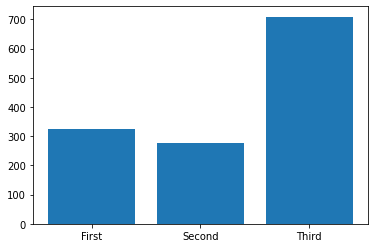

In [14]:
plt.bar(passenger_class, passenger_class_value)

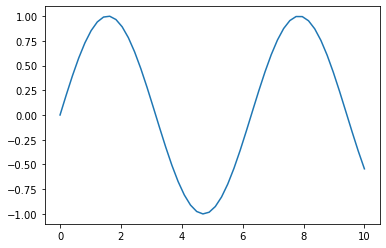

In [15]:
#EX1
x = np.linspace(0,10) 
plt.plot(x,np.sin(x))
plt.show()

In [20]:
sex= np.unique(titanics[1:,1])
sex

array(['Female', 'Male'], dtype='<U84')

In [21]:
survived = np.unique(titanics[1:,4])
survived

array(['No', 'Yes'], dtype='<U84')

In [22]:

sex_value = [sum(titanics[:,1]==sex[0]),sum(titanics[:,1]==sex[1]),]
sex_value

[466, 843]

In [23]:
survived_value = [sum(titanics[:,4]==survived[0]),
                  sum(titanics[:,4]==survived[1]),]     
survived_value

[809, 500]

<BarContainer object of 2 artists>

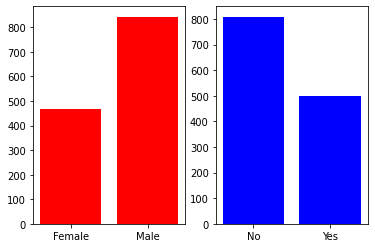

In [24]:
#EX2
plt.subplot(1,2,1)
plt.bar(sex, sex_value,color = 'Red')
plt.subplot(1,2,2)
plt.bar(survived, survived_value,color = 'Blue')

([<matplotlib.patches.Wedge at 0x7f3c7fcd1ad0>,
 [Text(0.33991867422268784, 1.0461621742897658, 'First'),
  Text(-1.092170857863596, -0.1310069358221036, 'Second'),
  Text(0.46209433714212755, -0.9982328503817023, 'Third')],
 [Text(0.1854101859396479, 0.5706339132489631, '40.0%'),
  Text(-0.5957295588346887, -0.07145832863023831, '23.8%'),
  Text(0.2520514566229786, -0.5444906456627466, '36.2%')])

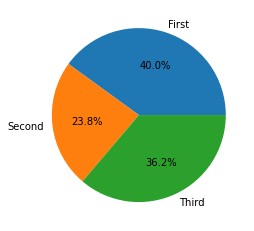

In [33]:
#EX3
class_survi = [sum((titanics[:,0]==passenger_class[0]) & (titanics[:,4]==survived[1] )),  
               sum((titanics[:,0]==passenger_class[1]) & (titanics[:,4]==survived[1] )),
               sum((titanics[:,0]==passenger_class[2]) & (titanics[:,4]==survived[1] )) ] 
plt.pie(class_survi, labels=passenger_class, autopct='%1.1f%%', 
        startangle=0)